# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [2]:
# Import thư viện: 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df 


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,36295.0,...,0.000000e+00,0.0,7.990000e+02,Europe,28.0,0.0,0.0,0.0,0.0,0.0
227,Western Sahara,10.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,16.0,...,0.000000e+00,0.0,6.261610e+05,Africa,62616.0,626161.0,0.0,0.0,0.0,0.0
228,MS Zaandam,9.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
229,Tokelau,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3628.0,...,0.000000e+00,0.0,1.378000e+03,Australia/Oceania,276.0,0.0,0.0,0.0,0.0,3628.0


In [4]:
# Define the custom formatting function
def format_y_axis(value, pos=0):
    if value >= 1_000_000_000:
        return f"{value/1_000_000_000:.2f}B"
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return f"{value:.0f}"

### 2.1 Biểu đồ: 

#### Mối quan hệ xoay quanh trường dữ liệu Total Cases và Total Cases/1M population (Tổng số ca nhiễm và tổng số ca nhiễm trên 1 triệu dân)

##### Tỉ lệ số ca nhiễm và tỉ lệ số ca hồi phục của các Châu lục so với toàn lục địa

- Trường dữ liệu được trực quan: Total Cases, Total Recovered, Continent
- Biểu đồ sử dụng: Nested Pie chart (Nested Donut chart)
- Tính phù hợp của biểu đồ: dễ dàng so sánh tỉ lệ số ca hồi phục so với số ca nhiễm khi cái trước là 1 phần của cái sau
- Mục đích của câu hỏi: để xem tình hình và kết quả khám chữa bệnh các bệnh nhân nhiễm Covid-19 ở các châu lục đã và đang diễn ra như thế nào, và phần nào chứng tỏ mức độ hiện đại và hiệu quả của nền y học của các châu lục
- Giải thích cách làm/thuật toán:
  + Đầu tiên sử dụng Pandas pivot table để tính tổng số ca nhiễm và tổng số ca hồi phục trên các châu lục, sau đó lọc bỏ đi dữ liệu "Unknown" (không rõ châu lục) và sắp xếp dữ liệu theo thứ tự tăng dần của tổng số ca nhiễm
  + Tiếp theo sử dungl matplotlib.pylot (plt) để biểu diễn biểu đồ Donut với vòng tròn ngoài là tổng số ca nhiễm, vòng tròn trong là tổng số ca hồi phục.

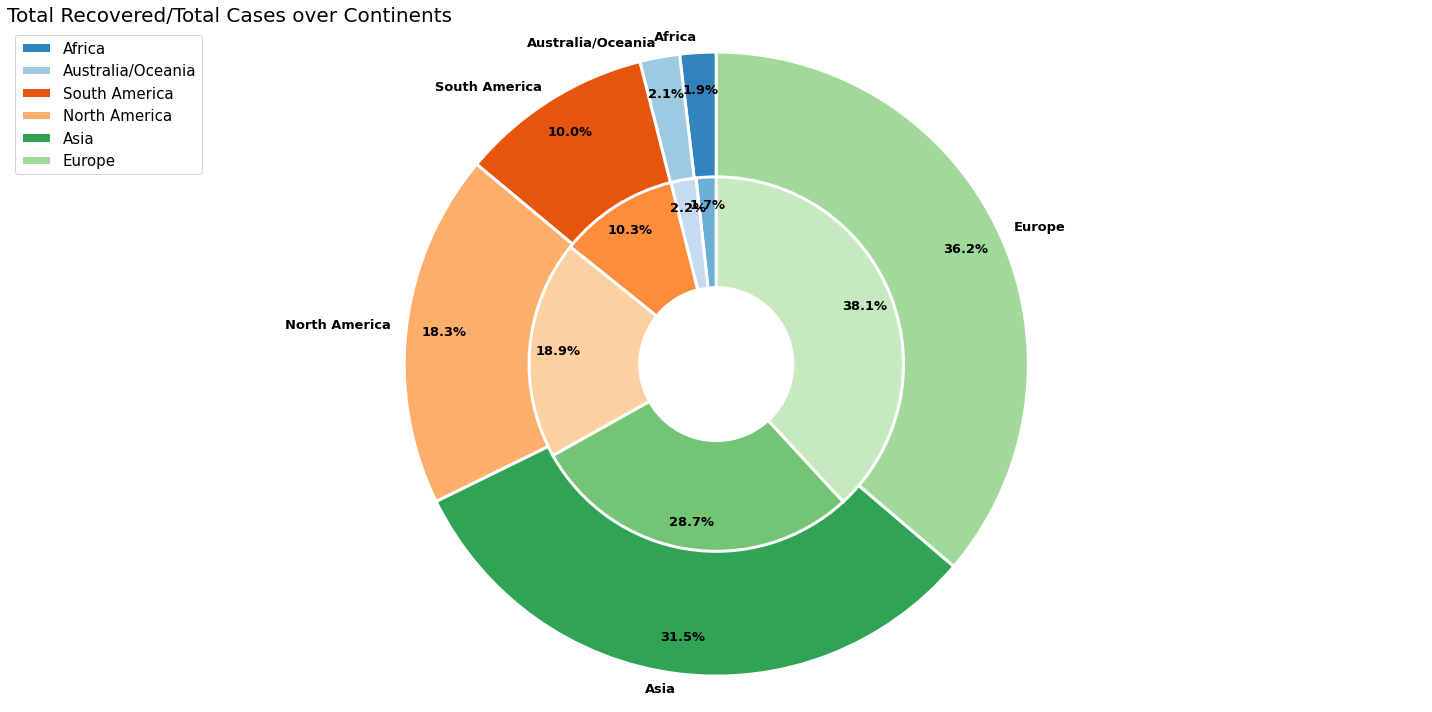

In [5]:
continent_total_cases = pd.pivot_table(data=covid_df,
                                        values=['Total Cases', 'Total Recovered'],
                                        index='Continent',
                                        aggfunc='sum',
                                      ).drop(index='Unknown').sort_values(by='Total Cases')

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(6)*2)
inner_colors = cmap([1, 3, 5, 7, 9, 11])

plt.figure(figsize=(20,10))

plt.pie (
  continent_total_cases['Total Cases'],
  labels=continent_total_cases.index,
  startangle=90, pctdistance =0.88,
  colors=outer_colors,
  autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
  textprops ={ 'fontweight': 'bold','fontsize':13},
  wedgeprops = {'linewidth' : 3, 'edgecolor' : "w"}
)

plt.pie (
  continent_total_cases['Total Recovered'],
  startangle=90, pctdistance =0.85,
  colors=inner_colors,
  autopct = '%1.1f%%', radius= 0.6, labeldistance=1.05,
  textprops ={ 'fontweight': 'bold','fontsize':13},
  wedgeprops = {'linewidth' : 3, 'edgecolor' : "w"}
)

centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Total Recovered/Total Cases over Continents', fontsize=20, loc='left')
plt.axis('equal')
plt.legend(loc=2, fontsize=15)
plt.tight_layout()
plt.show()

- Nhận xét biểu đồ:
  + Châu Âu, Châu Á là hai châu lục có số ca nhiễm nhiều nhất thế giới, theo sau đó là Châu Mỹ (gồm Bắc Mỹ và Nam Mỹ)
  + Các Châu lục kể trên với Châu Đại dương và Châu Phi, ngoại trừ Châu Á và Châu Phi, có tỉ lệ số ca hồi phục cao hơn tỉ lệ số ca nhiễm (so với toàn thế giới), phần nào chứng tỏ hiệu quả của công tác khám chữa bệnh ở các châu lục này.

##### Tổng số ca dương tính, âm tính và số lần test trên 1 triệu dân của top 10 quốc gia sắp xếp tăng dần theo tổng số ca nhiễm

- Trường dữ liệu được trực quan: Country, Tests/1M pop, Tot Cases/1M pop
- Biểu đồ sử dụng: Nested&Stacked Bar chart
- Tính phù hợp của biểu đồ: dễ dàng so sánh giữa số ca dương tính so với số ca âm tính và so sánh với số lần test trên 1 triệu dân
- Mục đích của câu hỏi: để xem tình hình, mức độ kiểm soát, phát hiện và ngăn ngừa dịch bệnh ở các quốc gia đứng đầu về số ca nhiễm
- Giải thích cách làm/thuật toán
  + Dùng nlargest để lấy ra dữ liệu của 10 quốc gia có số ca nhiễm nhiều nhất, sau đó lấy dữ liệu về số lượt test trên 1 triệu dân và số ca nhiễm trên 1 triệu dân của các quốc gia đó, cuối cùng sắp xếp dữ liệu sau cùng theo thứ tự tăng dần số ca nhiễm trên 1 triệu dân
  + Dùng plt để vẽ biểu đồ cột ghép&chồng (số ca nhiễm chồng với số người âm tính, ghép với cột số lượt test) với trục dọc (y) là số lượng, trục ngang (x) là các quốc gia

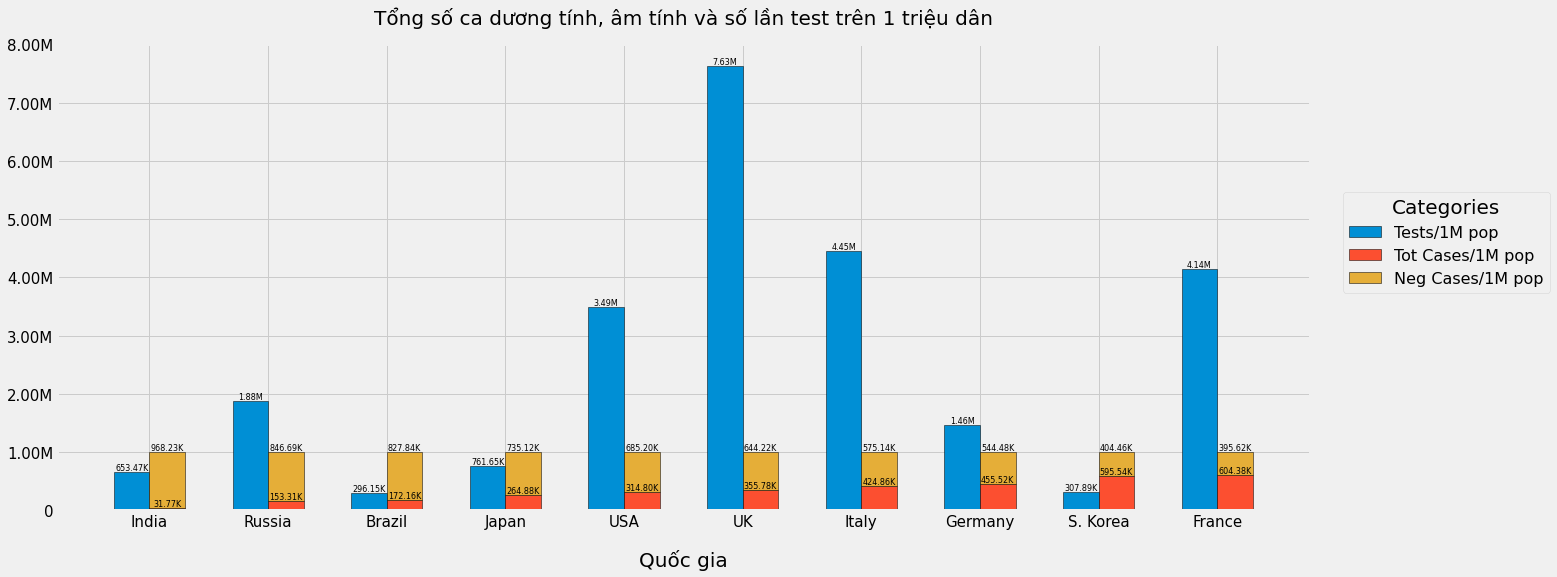

In [8]:
case_test_1m_pop = covid_df.nlargest(columns='Total Cases', n=10).loc[:, ['Country', 'Tests/1M pop', 'Tot Cases/1M pop']].sort_values('Tot Cases/1M pop')
case_test_1m_pop['Neg./1M pop'] = 10**6 - case_test_1m_pop['Tot Cases/1M pop']

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (20,8))
label = case_test_1m_pop['Country']

x = np.arange(len(label))
width = 0.3

rect1 = ax.bar(x - width/2,
              case_test_1m_pop['Tests/1M pop'],
              width = width, 
               label = 'Tests/1M pop',
               edgecolor = "black"
)

rect2 = ax.bar(x + width/2,
              case_test_1m_pop['Tot Cases/1M pop'],
              width = width,
               label = 'Tot Cases/1M pop',
               edgecolor = "black"
)
rect3 = ax.bar(x + width/2,
              case_test_1m_pop['Neg./1M pop'],
              width = width, 
               label = 'Neg Cases/1M pop',
               edgecolor = "black",
               bottom=case_test_1m_pop['Tot Cases/1M pop']
)
ax.bar_label(rect1, fontsize=8, labels=[format_y_axis(x) for x in case_test_1m_pop.iloc[:, 1]], label_type="edge")
ax.bar_label(rect2, fontsize=8, labels=[format_y_axis(x) for x in case_test_1m_pop.iloc[:, 2]], label_type="edge")
ax.bar_label(rect3, fontsize=8, labels=[format_y_axis(x) for x in case_test_1m_pop.iloc[:, 3]], label_type="edge")

# ax.set_ylabel("Số lượng", fontsize = 20, labelpad = 20)
ax.set_xlabel("Quốc gia", fontsize = 20, labelpad =20)
ax.set_title("Tổng số ca dương tính, âm tính và số lần test trên 1 triệu dân", fontsize = 20, pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legends
#using the labels of the bars
ax.legend(title = "Categories", fontsize = 16, title_fontsize = 20, bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x", which = "both", labelrotation = 90, labelsize = 15)
ax.tick_params(axis = "y", which = "both", labelsize = 15)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_tick_params(rotation=0)


plt.show()

- Nhận xét biểu đồ:
  + 3 quốc gia lớn của Châu Âu gồm Anh, Ý và Pháp lần lượt là 3 nước dẫn đầu về mức độ kiểm tra phòng chống dịch bệnh, theo sau đó là 2 siêu cường quốc Mỹ và Nga
  + Hàn Quốc là nước có mức độ kiểm tra phòng chống dịch bệnh thấp thứ 2 (chỉ sau Brazil), nhưng lại có số ca dương tính trên 1 triệu người cao thứ 2 (chỉ sau Pháp)
  + Ấn độ là nước có số ca dương tính trên 1 triệu dân thấp nhất, thấp hơn đáng kể so với các nước còn lại trong top 10

##### Trung bình số ca tử vong, đang điều trị và đã hồi phục trên 1 triệu dân của 6 châu lục

- Trường dữ liệu được trực quan: Continent, Active Cases/1M pop, Tot Cases/1M pop, Deaths/1M pop
- Biểu đồ sử dụng: Stacked Bar chart
- Tính phù hợp của biểu đồ: dễ dàng so sánh tỉ lệ giữa các tình huống của bệnh nhân Covid-19 (tử vong, đang điều trị, đã hồi phục)
- Mục đích của câu hỏi: để tỉ lệ giữa các tình huống của bệnh nhân Covid-19 (tử vong, đang điều trị, đã hồi phục) trung bình trên 1 triệu dân của 6 châu lục để đánh giá tình hình dịch bệnh ở các châu lục.
- Giải thích cách làm/thuật toán:
  + Dùng Pandas pivot table để lấy ra giá trị trung bình của tổng số ca nhiễm, số ca đang điều trị và số ca tử vong (trên 1 triệu dân) của các châu lục, loại bỏ đi dữ liệu không xác định và sắp xếp dữ liệu sau cùng theo thứ tự tăng dần số ca nhiễm trên 1 triệu dân.
  + Với trường dữ liệu thu được từ việc xử lí trên, ta tính được số ca bệnh đã hồi phục bằng cách lấy tổng số ca nhiễm trừ đi số ca đang điều trị và số ca tử vong
  + Dùng plt.bar vẽ biểu đồ cột chồng gồm các giá trị của số ca hồi phục, số ca đang điều trị và số ca tử vong trên 1 triệu dân của các châu lục (trục ngang)

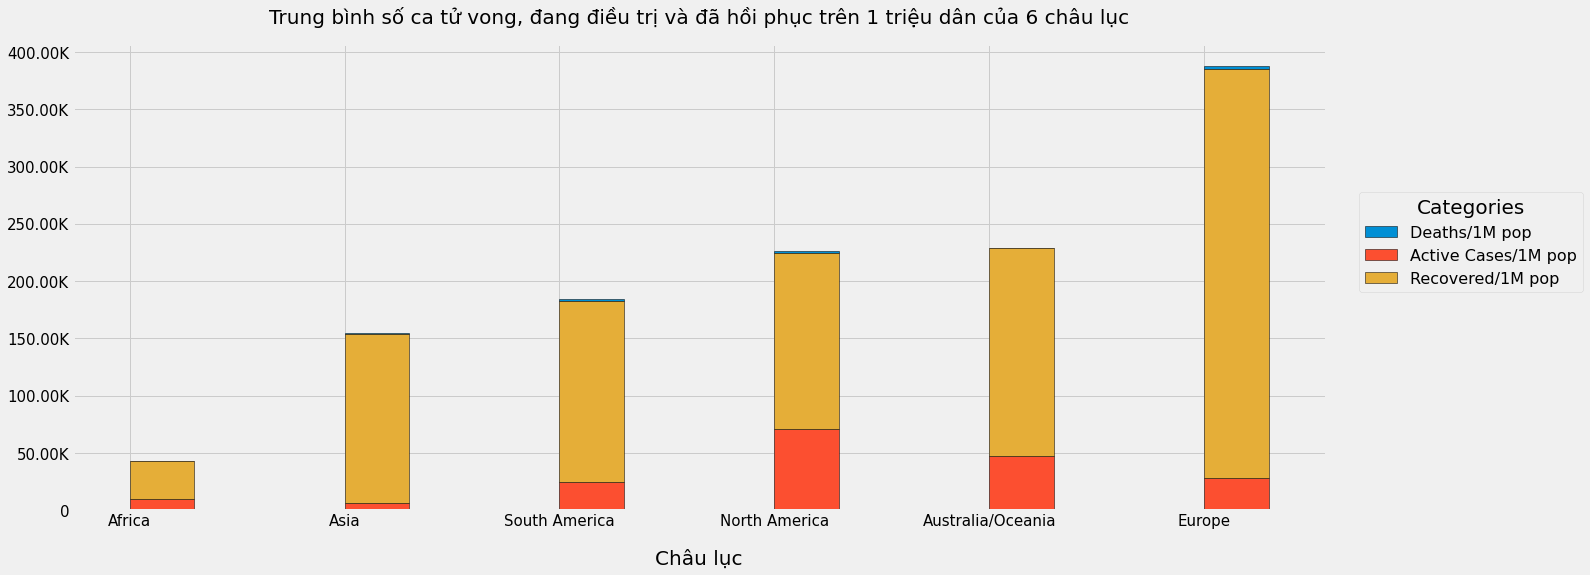

In [ ]:
mean_cases_1m_pop = pd.pivot_table(data=covid_df,
                                    values=['Tot Cases/1M pop', 'Active Cases/1M pop', 'Deaths/1M pop'],
                                    index='Continent',
                                    aggfunc='mean',
                                  ).drop(index='Unknown').sort_values(by='Tot Cases/1M pop').reset_index()
mean_cases_1m_pop['Recovered/1M pop'] = mean_cases_1m_pop['Tot Cases/1M pop'] - (mean_cases_1m_pop['Active Cases/1M pop'] + mean_cases_1m_pop['Deaths/1M pop'])

mean_cases_1m_pop = mean_cases_1m_pop.drop('Tot Cases/1M pop', axis=1)

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (20,8))
label = mean_cases_1m_pop['Continent']

x = np.arange(len(label))
width = 0.3

rect1 = ax.bar(x + width/2,
              mean_cases_1m_pop['Deaths/1M pop'],
              width = width, 
               label = 'Deaths/1M pop',
               edgecolor = "black",
               bottom=mean_cases_1m_pop['Active Cases/1M pop']+mean_cases_1m_pop['Recovered/1M pop']
)

rect2 = ax.bar(x + width/2,
              mean_cases_1m_pop['Active Cases/1M pop'],
              width = width,
               label = 'Active Cases/1M pop',
               edgecolor = "black"
)

rect3 = ax.bar(x + width/2,
              mean_cases_1m_pop['Recovered/1M pop'],
              width = width, 
               label = 'Recovered/1M pop',
               edgecolor = "black",
               bottom=mean_cases_1m_pop['Active Cases/1M pop']
)

# ax.set_ylabel("Số lượng", fontsize = 20, labelpad = 20)
ax.set_xlabel("Châu lục", fontsize = 20, labelpad =20)
ax.set_title("Trung bình số ca tử vong, đang điều trị và đã hồi phục trên 1 triệu dân của 6 châu lục", fontsize = 20, pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legends
#using the labels of the bars
ax.legend(title = "Categories", fontsize = 16, title_fontsize = 20, bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x", which = "both", labelrotation = 90, labelsize = 15)
ax.tick_params(axis = "y", which = "both", labelsize = 15)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_tick_params(rotation=0)


plt.show()

- Nhận xét biểu đồ:
  + Châu Âu là châu lục có số ca nhiễm trung bình trên 1 triệu dân cao nhất, nhưng cũng có số ca hồi phục cao nhất dựa vào nền y học tiên tiến của mình
  + Châu Đại dương với tổng số dân không cao của mình sở hữu số ca nhiễm trung bình trên 1 triệu dân cao thứ hai, cũng đứng thứ 2 về số ca đang điều trị (chỉ sau Bắc Mỹ)
  + Ngược lại, châu Á với số dân rất đông của mình, có mật độ dương tính không cao.